In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

In [376]:
from sklearn.cluster import KMeans

In [377]:
# center and scale the data
from sklearn.preprocessing import StandardScaler

In [378]:
# reading data into dataframe

telco= pd.read_csv("Telecom_Data.csv")

In [379]:
telco = telco.loc[telco['CHURNED'] == 0]

In [380]:
telco.head(5)

,Unnamed: 0,AGE,CHURNED,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,channel_low_churn,...,satellite_medium_churn_satellite,site_Missing,site_Spaceway,warranty_low_churn_warranty,warranty_medium_churn_warranty,recent_channel_low_churn_channel,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y
0,0,69.0,0,2.046575,0,1,0,0,1,1,...,1,0,0,1,0,1,0,0,1,0
1,1,43.0,0,3.271233,0,0,0,0,1,1,...,0,0,1,1,0,1,0,0,1,0
2,2,58.0,0,3.134247,0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
3,3,36.0,0,2.295890,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
4,4,56.0,0,1.536986,0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0


In [381]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4887 entries, 0 to 4886
Data columns (total 28 columns):
Unnamed: 0                                  4887 non-null int64
AGE                                         4887 non-null float64
CHURNED                                     4887 non-null int64
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE    4887 non-null float64
plan_low                                    4887 non-null int64
plan_medium                                 4887 non-null int64
plan_zero                                   4887 non-null int64
model_low                                   4887 non-null int64
model_medium                                4887 non-null int64
channel_low_churn                           4887 non-null int64
source_low_churn                            4887 non-null int64
source_medium_churn                         4887 non-null int64
source_zero_churn                           4887 non-null int64
zip_low_churn_zip                           4887 non-null

In [382]:
telco.head(5)

,Unnamed: 0,AGE,CHURNED,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,channel_low_churn,...,satellite_medium_churn_satellite,site_Missing,site_Spaceway,warranty_low_churn_warranty,warranty_medium_churn_warranty,recent_channel_low_churn_channel,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y
0,0,69.0,0,2.046575,0,1,0,0,1,1,...,1,0,0,1,0,1,0,0,1,0
1,1,43.0,0,3.271233,0,0,0,0,1,1,...,0,0,1,1,0,1,0,0,1,0
2,2,58.0,0,3.134247,0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
3,3,36.0,0,2.295890,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
4,4,56.0,0,1.536986,0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0


In [383]:
telco.describe()

,Unnamed: 0,AGE,CHURNED,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,channel_low_churn,...,satellite_medium_churn_satellite,site_Missing,site_Spaceway,warranty_low_churn_warranty,warranty_medium_churn_warranty,recent_channel_low_churn_channel,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y
count,4887.000000,4887.000000,4887.0,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,...,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,4887.0,4887.000000,4887.000000
mean,2443.000000,44.009822,0.0,2.729668,0.385308,0.371598,0.122979,0.163290,0.700225,0.995498,...,0.286065,0.001228,0.222018,0.965828,0.027215,0.844281,0.153264,0.0,0.583180,0.108246
std,1410.899713,13.498302,0.0,0.786275,0.486718,0.483281,0.328447,0.369668,0.458206,0.066951,...,0.451966,0.035021,0.415645,0.181690,0.162726,0.362626,0.360278,0.0,0.493083,0.310723
min,0.000000,22.000000,0.0,1.369863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1221.500000,32.000000,0.0,2.043836,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
50%,2443.000000,44.000000,0.0,2.726027,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000
75%,3664.500000,55.000000,0.0,3.408219,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000
max,4886.000000,92.000000,0.0,4.063096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [384]:
numeric_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['Unnamed: 0', 'AGE', 'CHURNED', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE', 'plan_low', 'plan_medium', 'plan_zero', 'model_low', 'model_medium', 'channel_low_churn', 'source_low_churn', 'source_medium_churn', 'source_zero_churn', 'zip_low_churn_zip', 'zip_medium_churn_zip', 'feedback_GOOD', 'feedback_Missing', 'satellite_low_churn_satellite', 'satellite_medium_churn_satellite', 'site_Missing', 'site_Spaceway', 'warranty_low_churn_warranty', 'warranty_medium_churn_warranty', 'recent_channel_low_churn_channel', 'recent_channel_medium_churn_channel', 'status_Unknown', 'comp_owner_N', 'comp_owner_Y']
[]


In [385]:
telco_num=telco[numeric_var_names]
telco_num.head(5)

,Unnamed: 0,AGE,CHURNED,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,channel_low_churn,...,satellite_medium_churn_satellite,site_Missing,site_Spaceway,warranty_low_churn_warranty,warranty_medium_churn_warranty,recent_channel_low_churn_channel,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y
0,0,69.0,0,2.046575,0,1,0,0,1,1,...,1,0,0,1,0,1,0,0,1,0
1,1,43.0,0,3.271233,0,0,0,0,1,1,...,0,0,1,1,0,1,0,0,1,0
2,2,58.0,0,3.134247,0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
3,3,36.0,0,2.295890,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
4,4,56.0,0,1.536986,0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0


In [386]:
#No categorical variables

In [387]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=telco_num.apply(lambda x: var_summary(x)).T

In [388]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Unnamed: 0,4887.0,0.0,1.193894e+07,2443.000000,2443.000000,1410.899713,1.990638e+06,0.000000,48.86,244.300000,488.600000,1221.500000,2443.000000,3664.500000,4397.400000,4641.700000,4837.140000,4886.000000
AGE,4887.0,0.0,2.150760e+05,44.009822,44.000000,13.498302,1.822042e+02,22.000000,22.00,24.000000,26.000000,32.000000,44.000000,55.000000,63.000000,66.000000,74.000000,92.000000
CHURNED,4887.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,4887.0,0.0,1.333989e+04,2.729668,2.726027,0.786275,6.182285e-01,1.369863,1.40,1.507671,1.654795,2.043836,2.726027,3.408219,3.821918,3.969863,4.063096,4.063096
plan_low,4887.0,0.0,1.883000e+03,0.385308,0.000000,0.486718,2.368942e-01,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
plan_medium,4887.0,0.0,1.816000e+03,0.371598,0.000000,0.483281,2.335607e-01,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
plan_zero,4887.0,0.0,6.010000e+02,0.122979,0.000000,0.328447,1.078775e-01,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
model_low,4887.0,0.0,7.980000e+02,0.163290,0.000000,0.369668,1.366546e-01,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
model_medium,4887.0,0.0,3.422000e+03,0.700225,1.000000,0.458206,2.099529e-01,0.000000,0.00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
channel_low_churn,4887.0,0.0,4.865000e+03,0.995498,1.000000,0.066951,4.482391e-03,0.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [389]:
#No need for outlier capping as the data is already processed

In [390]:
telco_num.corr().info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Unnamed: 0 to comp_owner_Y
Data columns (total 28 columns):
Unnamed: 0                                  26 non-null float64
AGE                                         26 non-null float64
CHURNED                                     0 non-null float64
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE    26 non-null float64
plan_low                                    26 non-null float64
plan_medium                                 26 non-null float64
plan_zero                                   26 non-null float64
model_low                                   26 non-null float64
model_medium                                26 non-null float64
channel_low_churn                           26 non-null float64
source_low_churn                            26 non-null float64
source_medium_churn                         26 non-null float64
source_zero_churn                           26 non-null float64
zip_low_churn_zip                           26 non-n

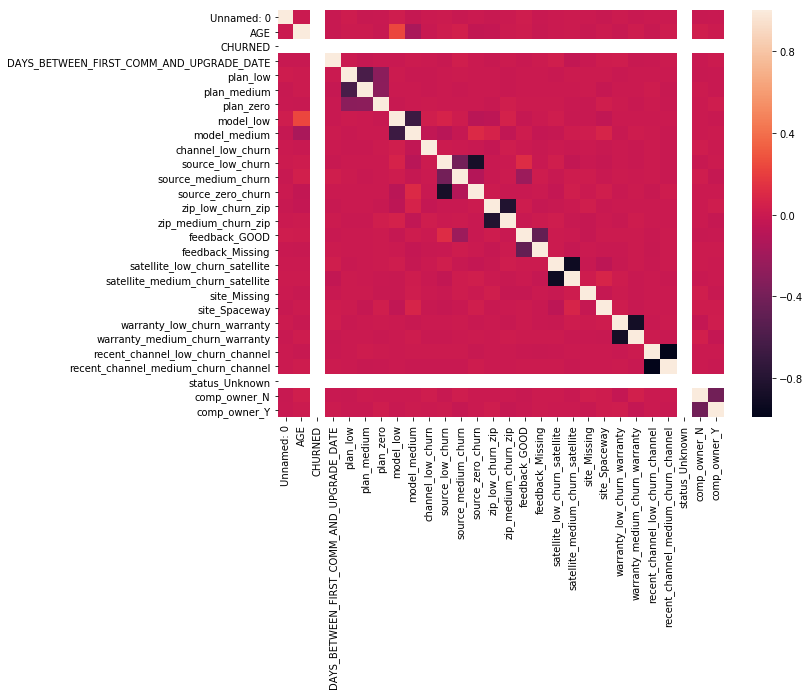

In [391]:
sns.heatmap(telco_num.corr())

In [392]:
#zip_low_churn_zip and zip_medium_churn_zip seem to be correlated

In [393]:
telco_num.corr().loc['zip_low_churn_zip']['zip_medium_churn_zip']

-0.81477027557608084

In [394]:
telco_num.corr().loc['plan_low']['plan_medium']

-0.60882602656236162

In [395]:
telco_num.corr().loc['recent_channel_low_churn_channel']['recent_channel_medium_churn_channel']

-0.99064476555054504

Standardrizing data
To put data on the same scale

In [396]:
sc=StandardScaler()

telco_scaled=sc.fit_transform(telco_num)

In [397]:
pd.DataFrame(telco_scaled).head(5)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-1.731696,1.851547,0.0,-0.868860,-0.791727,1.300415,-0.374465,-0.441767,0.654303,0.067247,...,1.579781,-0.035061,-0.534206,0.188099,-0.167262,0.429465,-0.425447,0.0,0.845421,-0.348405
1,-1.730988,-0.074819,0.0,0.688843,-0.791727,-0.768985,-0.374465,-0.441767,0.654303,0.067247,...,-0.632999,-0.035061,1.871937,0.188099,-0.167262,0.429465,-0.425447,0.0,0.845421,-0.348405
2,-1.730279,1.036546,0.0,0.514603,-0.791727,-0.768985,2.670477,-0.441767,0.654303,0.067247,...,-0.632999,-0.035061,-0.534206,0.188099,-0.167262,0.429465,-0.425447,0.0,0.845421,-0.348405
3,-1.729570,-0.593455,0.0,-0.551744,-0.791727,1.300415,-0.374465,-0.441767,0.654303,0.067247,...,-0.632999,-0.035061,-0.534206,0.188099,-0.167262,0.429465,-0.425447,0.0,-1.182842,-0.348405
4,-1.728861,0.888364,0.0,-1.517031,-0.791727,-0.768985,2.670477,-0.441767,0.654303,0.067247,...,-0.632999,-0.035061,-0.534206,0.188099,-0.167262,0.429465,-0.425447,0.0,-1.182842,-0.348405


In [398]:
pd.DataFrame(telco_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,4.887000e+03,4.887000e+03,4887.0,4.887000e+03,4.887000e+03,4.887000e+03,4.887000e+03,4.887000e+03,4.887000e+03,4.887000e+03,...,4.887000e+03,4.887000e+03,4.887000e+03,4.887000e+03,4.887000e+03,4.887000e+03,4.887000e+03,4887.0,4.887000e+03,4.887000e+03
mean,6.479141e-17,1.416687e-16,0.0,-2.639818e-16,-3.407683e-18,1.521190e-16,-4.897067e-16,-1.072829e-15,1.333994e-16,1.043432e-16,...,-3.425857e-17,1.831913e-17,3.494011e-17,-5.105617e-16,3.976766e-17,2.511235e-16,1.664539e-16,0.0,-5.579512e-16,-2.550764e-16
std,1.000102e+00,1.000102e+00,0.0,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,...,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,0.0,1.000102e+00,1.000102e+00
min,-1.731696e+00,-1.630729e+00,0.0,-1.729604e+00,-7.917265e-01,-7.689853e-01,-3.744649e-01,-4.417666e-01,-1.528344e+00,-1.487065e+01,...,-6.329991e-01,-3.506075e-02,-5.342061e-01,-5.316340e+00,-1.672616e-01,-2.328479e+00,-4.254472e-01,0.0,-1.182842e+00,-3.484049e-01
25%,-8.658482e-01,-8.898194e-01,0.0,-8.723445e-01,-7.917265e-01,-7.689853e-01,-3.744649e-01,-4.417666e-01,-1.528344e+00,6.724654e-02,...,-6.329991e-01,-3.506075e-02,-5.342061e-01,1.880993e-01,-1.672616e-01,4.294649e-01,-4.254472e-01,0.0,-1.182842e+00,-3.484049e-01
50%,0.000000e+00,-7.277198e-04,0.0,-4.630925e-03,-7.917265e-01,-7.689853e-01,-3.744649e-01,-4.417666e-01,6.543028e-01,6.724654e-02,...,-6.329991e-01,-3.506075e-02,-5.342061e-01,1.880993e-01,-1.672616e-01,4.294649e-01,-4.254472e-01,0.0,8.454211e-01,-3.484049e-01
75%,8.658482e-01,8.142730e-01,0.0,8.630827e-01,1.263062e+00,1.300415e+00,-3.744649e-01,-4.417666e-01,6.543028e-01,6.724654e-02,...,1.579781e+00,-3.506075e-02,-5.342061e-01,1.880993e-01,-1.672616e-01,4.294649e-01,-4.254472e-01,0.0,8.454211e-01,-3.484049e-01
max,1.731696e+00,3.555639e+00,0.0,1.696053e+00,1.263062e+00,1.300415e+00,2.670477e+00,2.263639e+00,6.543028e-01,6.724654e-02,...,1.579781e+00,2.852192e+01,1.871937e+00,1.880993e-01,5.978659e+00,4.294649e-01,2.350468e+00,0.0,8.454211e-01,2.870224e+00


In [399]:
telco_scaled[:5]

array([[-1.73169642,  1.85154658,  0.        , -0.86885975, -0.79172653,
         1.30041505, -0.37446493, -0.44176661,  0.65430285,  0.06724654,
        -1.82339759, -0.22070896,  2.10046665,  1.29473616, -1.05491254,
        -1.00512876,  2.08350273, -1.45148279,  1.57978105, -0.03506075,
        -0.53420606,  0.18809932, -0.16726159,  0.42946494, -0.4254472 ,
         0.        ,  0.8454211 , -0.34840487],
       [-1.73098758, -0.07481869,  0.        ,  0.68884301, -0.79172653,
        -0.76898526, -0.37446493, -0.44176661,  0.65430285,  0.06724654,
        -1.82339759, -0.22070896,  2.10046665, -0.77235813,  0.94794588,
         0.99489741, -0.47996098,  0.68895064, -0.63299911, -0.03506075,
         1.87193682,  0.18809932, -0.16726159,  0.42946494, -0.4254472 ,
         0.        ,  0.8454211 , -0.34840487],
       [-1.73027874,  1.03654589,  0.        ,  0.51460333, -0.79172653,
        -0.76898526,  2.67047703, -0.44176661,  0.65430285,  0.06724654,
        -1.82339759, -0.2207

# Applying PCA

In [400]:
from sklearn.decomposition import PCA

In [401]:
pc = PCA(n_components=27)

In [402]:
pc.fit(telco_scaled)

#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [403]:
var

array([  8.09665138e-02,   7.68207614e-02,   7.39492586e-02,
         7.23219702e-02,   7.13025639e-02,   6.41332430e-02,
         6.19211079e-02,   5.72622749e-02,   5.41623091e-02,
         4.65645083e-02,   4.10352542e-02,   3.97629369e-02,
         3.85964599e-02,   3.80247351e-02,   3.74621926e-02,
         3.71350755e-02,   3.38166101e-02,   2.22722457e-02,
         1.85303749e-02,   1.21950196e-02,   7.13553409e-03,
         6.91931607e-03,   4.24293009e-03,   3.10883346e-03,
         3.57970950e-04,   1.62726229e-32,   5.94443647e-34])

In [404]:
var1

array([  8.1 ,  15.78,  23.17,  30.4 ,  37.53,  43.94,  50.13,  55.86,
        61.28,  65.94,  70.04,  74.02,  77.88,  81.68,  85.43,  89.14,
        92.52,  94.75,  96.6 ,  97.82,  98.53,  99.22,  99.64,  99.95,
        99.99,  99.99,  99.99])

In [405]:
#Alternative method

var_ratio={}
for n in range(2,27):
    pc=PCA(n_components=n)
    telco_pca=pc.fit(telco_scaled)
    var_ratio[n]=sum(telco_pca.explained_variance_ratio_)
    
var_ratio

{2: 0.15776592642678977,
 3: 0.23152933548578533,
 4: 0.30384296679687367,
 5: 0.37524544625135436,
 6: 0.43940867607507683,
 7: 0.50141024970540393,
 8: 0.5586521852756271,
 9: 0.61283895470124594,
 10: 0.65940450936047135,
 11: 0.7004397646554007,
 12: 0.74020270137885913,
 13: 0.77879916193544119,
 14: 0.81682389702480307,
 15: 0.85428608957952001,
 16: 0.89142116511740233,
 17: 0.92523777520847406,
 18: 0.9475100209327213,
 19: 0.96604039578493306,
 20: 0.97823541533599512,
 21: 0.98537094943047909,
 22: 0.99229026550070321,
 23: 0.99653319558923237,
 24: 0.99964202905048094,
 25: 1.0,
 26: 1.0}

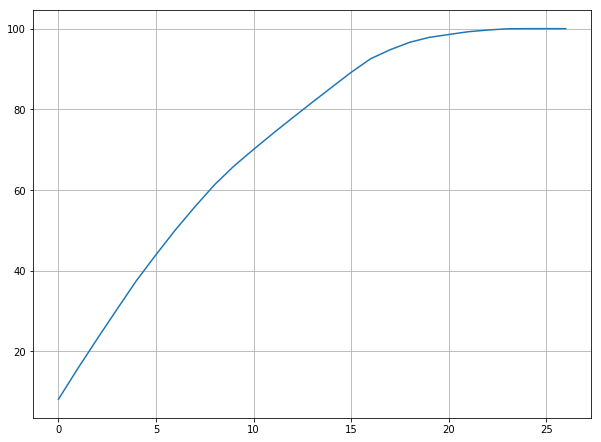

In [406]:
plt.plot(var1)

In [407]:
pc_final=PCA(n_components=14).fit(telco_scaled)

reduced_cr=pc_final.fit_transform(telco_scaled)

In [408]:
print(pc_final.components_.shape)
pc_final.explained_variance_ratio_

(14, 28)


array([ 0.08096651,  0.07682076,  0.07394926,  0.07232197,  0.07130256,
        0.06413324,  0.06192111,  0.05726227,  0.05416231,  0.04656451,
        0.04103525,  0.03976294,  0.03859646,  0.03802474])

In [409]:
print(sum(pc_final.explained_variance_ratio_))

0.816823897025


In [410]:
reduced_cr[0]

array([ 3.40146045, -0.66233859, -0.16167382,  0.61873835, -0.07987966,
        1.98964947,  1.91410634,  0.78049579, -0.57313204, -0.25326611,
       -1.25622276, -0.93656622, -0.45643591,  1.88642074])

In [411]:
reduced_cr.shape

(4887, 14)

In [412]:
pd.DataFrame(reduced_cr).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.401460,-0.662339,-0.161674,0.618738,-0.079880,1.989649,1.914106,0.780496,-0.573132,-0.253266,-1.256223,-0.936566,-0.456436,1.886421
1,1.544594,-0.402068,1.315475,-0.041774,-2.005547,-1.152015,-0.147552,-1.639141,-0.885286,0.376935,0.261471,-1.807282,-0.983244,1.022318
2,1.317603,-0.395036,1.604026,0.252586,-2.495912,-0.419365,0.041942,-0.616370,-0.515064,2.739618,0.081584,-0.426942,-0.614186,1.421349
3,-0.950650,-0.605969,0.104545,-0.606772,-0.482298,-1.946407,1.262374,-0.400805,0.379860,-0.777624,0.400620,0.008858,-0.440952,1.588651
4,-0.174518,-0.496492,-0.038210,-1.737350,0.076040,0.889749,0.209529,2.012973,0.893721,2.852398,-0.755349,-0.099214,0.146102,2.182141


In [413]:
col_list=telco_num.columns
col_list

Index(['Unnamed: 0', 'AGE', 'CHURNED',
       'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE', 'plan_low', 'plan_medium',
       'plan_zero', 'model_low', 'model_medium', 'channel_low_churn',
       'source_low_churn', 'source_medium_churn', 'source_zero_churn',
       'zip_low_churn_zip', 'zip_medium_churn_zip', 'feedback_GOOD',
       'feedback_Missing', 'satellite_low_churn_satellite',
       'satellite_medium_churn_satellite', 'site_Missing', 'site_Spaceway',
       'warranty_low_churn_warranty', 'warranty_medium_churn_warranty',
       'recent_channel_low_churn_channel',
       'recent_channel_medium_churn_channel', 'status_Unknown', 'comp_owner_N',
       'comp_owner_Y'],
      dtype='object')

# Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [414]:
pc_final.components_

array([[ -1.91111270e-02,  -1.41589671e-01,   1.11022302e-16,
         -7.44150781e-04,   8.01767801e-03,  -6.99359873e-03,
         -2.82688240e-03,  -3.26117663e-01,   3.33670773e-01,
         -3.87831713e-02,  -4.89585539e-01,   1.41207542e-01,
          4.55274450e-01,   1.90534669e-01,  -1.87125371e-01,
         -8.13254710e-02,   1.87563497e-02,  -3.20122542e-01,
          3.17311394e-01,   3.82585671e-02,   9.30098863e-02,
          2.54128689e-02,  -1.74653764e-02,  -1.87662932e-02,
          2.07940478e-02,  -0.00000000e+00,  -1.45050109e-03,
          7.86810882e-03],
       [  3.31091536e-03,   2.21979864e-02,   4.51028104e-17,
          1.63767948e-02,   2.17219779e-02,  -2.94062974e-02,
         -7.54314002e-03,   1.98228680e-02,  -2.41530157e-02,
         -5.11508277e-03,  -2.59374989e-02,  -8.73156183e-03,
          3.29110466e-02,   8.72055104e-03,  -1.12264590e-02,
          8.42143830e-03,   1.20291635e-02,   6.90621228e-02,
         -6.70525133e-02,  -1.64355562e-04,

In [415]:
print(pd.DataFrame(pc_final.components_,columns=telco_num.columns))

    Unnamed: 0       AGE       CHURNED  \
0    -0.019111 -0.141590  1.110223e-16   
1     0.003311  0.022198  4.510281e-17   
2    -0.022071 -0.015357 -0.000000e+00   
3     0.017169  0.146263  5.551115e-17   
4    -0.005142 -0.005374  8.326673e-17   
5     0.005452  0.236047 -1.457168e-16   
6    -0.034539  0.029196  6.245005e-17   
7    -0.046905 -0.143878  2.775558e-17   
8     0.010468 -0.011780  2.081668e-16   
9    -0.029620  0.007008  6.765422e-17   
10   -0.225978  0.150567  1.387779e-16   
11    0.323110 -0.241104 -8.326673e-17   
12    0.386903  0.200749  1.665335e-16   
13   -0.783950  0.120325 -2.498002e-16   

    DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE  plan_low  plan_medium  \
0                                  -0.000744  0.008018    -0.006994   
1                                   0.016377  0.021722    -0.029406   
2                                   0.014552 -0.009577     0.005883   
3                                  -0.026912  0.018383    -0.017551   
4             

In [416]:
#printing transpose of dataframe above
print(pd.DataFrame(pc_final.components_,columns=telco_num.columns).T)

                                                    0             1   \
Unnamed: 0                               -1.911113e-02  3.310915e-03   
AGE                                      -1.415897e-01  2.219799e-02   
CHURNED                                   1.110223e-16  4.510281e-17   
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE -7.441508e-04  1.637679e-02   
plan_low                                  8.017678e-03  2.172198e-02   
plan_medium                              -6.993599e-03 -2.940630e-02   
plan_zero                                -2.826882e-03 -7.543140e-03   
model_low                                -3.261177e-01  1.982287e-02   
model_medium                              3.336708e-01 -2.415302e-02   
channel_low_churn                        -3.878317e-02 -5.115083e-03   
source_low_churn                         -4.895855e-01 -2.593750e-02   
source_medium_churn                       1.412075e-01 -8.731562e-03   
source_zero_churn                         4.552745e-01  3.291105

In [417]:
print(pc_final.explained_variance_.shape)

(14,)


In [418]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=telco_num.columns).T

In [419]:
Loadings.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Unnamed: 0,-2.773129e-02,4.679705e-03,-0.030607,2.354636e-02,-7.001769e-03,7.041008e-03,-4.382832e-02,-5.723839e-02,1.242368e-02,-3.259419e-02,-2.334403e-01,3.285646e-01,3.876211e-01,-7.795651e-01
AGE,-2.054544e-01,3.137502e-02,-0.021296,2.005861e-01,-7.317274e-03,3.048392e-01,3.704826e-02,-1.755742e-01,-1.398073e-02,7.711553e-03,1.555394e-01,-2.451737e-01,2.011215e-01,1.196520e-01
CHURNED,1.610995e-16,6.374909e-17,-0.000000,7.612836e-17,1.133849e-16,-1.881838e-16,7.924707e-17,3.387004e-17,2.470536e-16,7.444808e-17,1.433606e-16,-8.467239e-17,1.668424e-16,-2.484031e-16
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,-1.079804e-03,2.314725e-02,0.020181,-3.690761e-02,-8.339649e-02,-2.384799e-02,-4.402140e-02,3.685257e-02,1.658325e-02,-1.264543e-02,3.762245e-01,-2.064122e-01,-4.202375e-01,-4.994863e-01
plan_low,1.163409e-02,3.070222e-02,-0.013280,2.521092e-02,3.275550e-02,1.303948e-01,-8.866387e-01,1.622794e-02,-6.600146e-02,-3.350454e-01,-2.575884e-02,-3.053537e-02,-1.129426e-02,4.360318e-02


In [420]:
Loadings.shape

(28, 14)

In [421]:
Loadings.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Unnamed: 0,-2.773129e-02,4.679705e-03,-0.030607,2.354636e-02,-7.001769e-03,7.041008e-03,-4.382832e-02,-5.723839e-02,1.242368e-02,-3.259419e-02,-2.334403e-01,3.285646e-01,3.876211e-01,-7.795651e-01
AGE,-2.054544e-01,3.137502e-02,-0.021296,2.005861e-01,-7.317274e-03,3.048392e-01,3.704826e-02,-1.755742e-01,-1.398073e-02,7.711553e-03,1.555394e-01,-2.451737e-01,2.011215e-01,1.196520e-01
CHURNED,1.610995e-16,6.374909e-17,-0.000000,7.612836e-17,1.133849e-16,-1.881838e-16,7.924707e-17,3.387004e-17,2.470536e-16,7.444808e-17,1.433606e-16,-8.467239e-17,1.668424e-16,-2.484031e-16
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,-1.079804e-03,2.314725e-02,0.020181,-3.690761e-02,-8.339649e-02,-2.384799e-02,-4.402140e-02,3.685257e-02,1.658325e-02,-1.264543e-02,3.762245e-01,-2.064122e-01,-4.202375e-01,-4.994863e-01
plan_low,1.163409e-02,3.070222e-02,-0.013280,2.521092e-02,3.275550e-02,1.303948e-01,-8.866387e-01,1.622794e-02,-6.600146e-02,-3.350454e-01,-2.575884e-02,-3.053537e-02,-1.129426e-02,4.360318e-02


In [422]:
Loadings.to_csv("Loadings_telecom_case_study.csv")

PermissionError: [Errno 13] Permission denied: 'Loadings_telecom_case_study.csv'

# Clustering

In [423]:
#list_var = ['channel_low_churn','plan_zero','model_low','model_medium','satellite_low_churn_satellite','source_medium_churn',
            #'zip_medium_churn_zip','satellite_medium_churn_satellite','site_Missing','warranty_medium_churn_warranty',
            #'recent_channel_low_churn_channel','CHURNED','DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE',
            #'recent_channel_low_churn_channel']

#list_var = ['channel_low_churn','plan_zero','model_medium','satellite_low_churn_satellite','source_medium_churn',
            #'site_Missing','warranty_medium_churn_warranty','CHURNED',DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE',
            #'recent_channel_low_churn_channel', 'comp_owner_N']

list_var = ['plan_low','plan_medium','plan_zero','source_low_churn','source_medium_churn',
            'feedback_GOOD','feedback_Missing','warranty_low_churn_warranty','warranty_medium_churn_warranty',
            'recent_channel_low_churn_channel','recent_channel_medium_churn_channel','comp_owner_N','comp_owner_Y','channel_low_churn']

In [424]:
telco_scaled1=pd.DataFrame(telco_scaled, columns=telco_num.columns)
telco_scaled1.head(5)

,Unnamed: 0,AGE,CHURNED,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,channel_low_churn,...,satellite_medium_churn_satellite,site_Missing,site_Spaceway,warranty_low_churn_warranty,warranty_medium_churn_warranty,recent_channel_low_churn_channel,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y
0,-1.731696,1.851547,0.0,-0.868860,-0.791727,1.300415,-0.374465,-0.441767,0.654303,0.067247,...,1.579781,-0.035061,-0.534206,0.188099,-0.167262,0.429465,-0.425447,0.0,0.845421,-0.348405
1,-1.730988,-0.074819,0.0,0.688843,-0.791727,-0.768985,-0.374465,-0.441767,0.654303,0.067247,...,-0.632999,-0.035061,1.871937,0.188099,-0.167262,0.429465,-0.425447,0.0,0.845421,-0.348405
2,-1.730279,1.036546,0.0,0.514603,-0.791727,-0.768985,2.670477,-0.441767,0.654303,0.067247,...,-0.632999,-0.035061,-0.534206,0.188099,-0.167262,0.429465,-0.425447,0.0,0.845421,-0.348405
3,-1.729570,-0.593455,0.0,-0.551744,-0.791727,1.300415,-0.374465,-0.441767,0.654303,0.067247,...,-0.632999,-0.035061,-0.534206,0.188099,-0.167262,0.429465,-0.425447,0.0,-1.182842,-0.348405
4,-1.728861,0.888364,0.0,-1.517031,-0.791727,-0.768985,2.670477,-0.441767,0.654303,0.067247,...,-0.632999,-0.035061,-0.534206,0.188099,-0.167262,0.429465,-0.425447,0.0,-1.182842,-0.348405


In [425]:
telco_scaled2=telco_scaled1[list_var]
telco_scaled2.head(5)

,plan_low,plan_medium,plan_zero,source_low_churn,source_medium_churn,feedback_GOOD,feedback_Missing,warranty_low_churn_warranty,warranty_medium_churn_warranty,recent_channel_low_churn_channel,recent_channel_medium_churn_channel,comp_owner_N,comp_owner_Y,channel_low_churn
0,-0.791727,1.300415,-0.374465,-1.823398,-0.220709,-1.005129,2.083503,0.188099,-0.167262,0.429465,-0.425447,0.845421,-0.348405,0.067247
1,-0.791727,-0.768985,-0.374465,-1.823398,-0.220709,0.994897,-0.479961,0.188099,-0.167262,0.429465,-0.425447,0.845421,-0.348405,0.067247
2,-0.791727,-0.768985,2.670477,-1.823398,-0.220709,-1.005129,-0.479961,0.188099,-0.167262,0.429465,-0.425447,0.845421,-0.348405,0.067247
3,-0.791727,1.300415,-0.374465,0.548427,-0.220709,0.994897,-0.479961,0.188099,-0.167262,0.429465,-0.425447,-1.182842,-0.348405,0.067247
4,-0.791727,-0.768985,2.670477,0.548427,-0.220709,-1.005129,2.083503,0.188099,-0.167262,0.429465,-0.425447,-1.182842,-0.348405,0.067247


In [426]:
from sklearn.cluster import KMeans

In [427]:
km_3=KMeans(n_clusters=3,random_state=123)

In [428]:
km_3.fit(telco_scaled2)
#km_4.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [429]:
pd.Series(km_3.labels_).value_counts()

1    4013
0     741
2     133
dtype: int64

In [430]:
km_4=KMeans(n_clusters=4,random_state=123).fit(telco_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(telco_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(telco_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(telco_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(telco_scaled2)
#km_5.labels_

In [431]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([telco_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
telco_num['cluster_3'] = km_3.labels_
telco_num['cluster_4'] = km_4.labels_
telco_num['cluster_5'] = km_5.labels_
telco_num['cluster_6'] = km_6.labels_
telco_num['cluster_7'] = km_7.labels_
telco_num['cluster_8'] = km_8.labels_

In [432]:
telco_num.head(5)

,Unnamed: 0,AGE,CHURNED,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,channel_low_churn,...,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0,69.0,0,2.046575,0,1,0,0,1,1,...,0,0,1,0,1,2,4,3,1,2
1,1,43.0,0,3.271233,0,0,0,0,1,1,...,0,0,1,0,1,0,1,1,2,0
2,2,58.0,0,3.134247,0,0,1,0,1,1,...,0,0,1,0,1,0,1,1,2,1
3,3,36.0,0,2.295890,0,1,0,0,1,1,...,0,0,0,0,1,2,0,1,1,2
4,4,56.0,0,1.536986,0,0,1,0,1,1,...,0,0,0,0,1,0,4,3,2,1


In [433]:
pd.Series.sort_index(telco_num.cluster_3.value_counts())

0     741
1    4013
2     133
Name: cluster_3, dtype: int64

In [434]:
pd.Series(telco_num.cluster_3.size)

0    4887
dtype: int64

In [435]:
size=pd.concat([pd.Series(telco_num.cluster_3.size), pd.Series.sort_index(telco_num.cluster_3.value_counts()), pd.Series.sort_index(telco_num.cluster_4.value_counts()),
           pd.Series.sort_index(telco_num.cluster_5.value_counts()), pd.Series.sort_index(telco_num.cluster_6.value_counts()),
           pd.Series.sort_index(telco_num.cluster_7.value_counts()), pd.Series.sort_index(telco_num.cluster_8.value_counts())])

In [436]:
size

0    4887
0     741
1    4013
2     133
0    2516
1     734
2    1504
3     133
0    1230
1    2047
2     133
3     731
4     746
0     221
1    1925
2    1202
3     705
4     133
5     701
0     425
1    1276
2    2113
3     699
4     220
5     132
6      22
0     994
1     475
2    1430
3     132
4     696
5      22
6     220
7     918
dtype: int64

In [437]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/telco_num.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,4887,741,4013,133,2516,734,1504,133,1230,2047,...,132,22,994,475,1430,132,696,22,220,918


In [438]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.151627,0.821158,0.027215,0.514835,0.150194,0.307755,0.027215,0.251688,0.418866,...,0.02701,0.004502,0.203397,0.097197,0.292613,0.02701,0.142419,0.004502,0.045017,0.187845


In [439]:
telco_num.head(5)

,Unnamed: 0,AGE,CHURNED,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,channel_low_churn,...,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0,69.0,0,2.046575,0,1,0,0,1,1,...,0,0,1,0,1,2,4,3,1,2
1,1,43.0,0,3.271233,0,0,0,0,1,1,...,0,0,1,0,1,0,1,1,2,0
2,2,58.0,0,3.134247,0,0,1,0,1,1,...,0,0,1,0,1,0,1,1,2,1
3,3,36.0,0,2.295890,0,1,0,0,1,1,...,0,0,0,0,1,2,0,1,1,2
4,4,56.0,0,1.536986,0,0,1,0,1,1,...,0,0,0,0,1,0,4,3,2,1


In [440]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([telco_num.apply(lambda x: x.mean()).T, telco_num.groupby('cluster_3').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_5').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_7').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [441]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,4887.000000,741.000000,4013.000000,133.000000,2516.000000,734.000000,1504.000000,133.000000,1230.000000,2047.000000,...,132.000000,22.000000,994.000000,475.000000,1430.000000,132.000000,696.000000,22.000000,220.000000,918.000000
Seg_Pct,1.000000,0.151627,0.821158,0.027215,0.514835,0.150194,0.307755,0.027215,0.251688,0.418866,...,0.027010,0.004502,0.203397,0.097197,0.292613,0.027010,0.142419,0.004502,0.045017,0.187845
Unnamed: 0,2443.000000,2450.157895,2444.093945,2370.112782,2462.064785,2453.012262,2412.666223,2370.112782,2405.893496,2475.226185,...,2358.772727,2426.136364,2491.634809,2464.949474,2416.523077,2358.772727,2460.827586,2426.136364,2364.950000,2437.929194
AGE,44.009822,44.421053,43.896337,45.142857,43.799285,44.378747,44.081782,45.142857,44.365854,43.770396,...,45.219697,45.318182,43.765594,43.294737,43.999301,45.219697,44.250000,45.318182,46.286364,43.727669
CHURNED,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,2.729668,2.743388,2.729421,2.660687,2.745372,2.741740,2.703606,2.660687,2.704113,2.743139,...,2.658344,2.707098,2.771640,2.681310,2.692891,2.658344,2.740897,2.707098,2.854922,2.738800
plan_low,0.385308,0.387314,0.384999,0.383459,0.615262,0.386921,0.000000,0.383459,0.000000,0.613581,...,0.378788,0.409091,0.773642,0.000000,0.000000,0.378788,0.385057,0.409091,0.395455,0.762527
plan_medium,0.371598,0.356275,0.374034,0.383459,0.000000,0.355586,1.000000,0.383459,1.000000,0.000000,...,0.386364,0.409091,0.000000,0.000000,1.000000,0.386364,0.357759,0.409091,0.350000,0.000000
plan_zero,0.122979,0.116059,0.124844,0.105263,0.199523,0.115804,0.000000,0.105263,0.000000,0.197851,...,0.106061,0.090909,0.000000,1.000000,0.000000,0.106061,0.119253,0.090909,0.122727,0.000000
model_low,0.163290,0.164642,0.163220,0.157895,0.161367,0.163488,0.166888,0.157895,0.166667,0.161700,...,0.159091,0.000000,0.149899,0.160000,0.168531,0.159091,0.156609,0.000000,0.200000,0.172113


In [442]:
Profling_output_final.to_csv('Profiling_output.csv')

In [443]:
telco_num.head(5)

,Unnamed: 0,AGE,CHURNED,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,channel_low_churn,...,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0,69.0,0,2.046575,0,1,0,0,1,1,...,0,0,1,0,1,2,4,3,1,2
1,1,43.0,0,3.271233,0,0,0,0,1,1,...,0,0,1,0,1,0,1,1,2,0
2,2,58.0,0,3.134247,0,0,1,0,1,1,...,0,0,1,0,1,0,1,1,2,1
3,3,36.0,0,2.295890,0,1,0,0,1,1,...,0,0,0,0,1,2,0,1,1,2
4,4,56.0,0,1.536986,0,0,1,0,1,1,...,0,0,0,0,1,0,4,3,2,1


# Finding optimal number of clusters

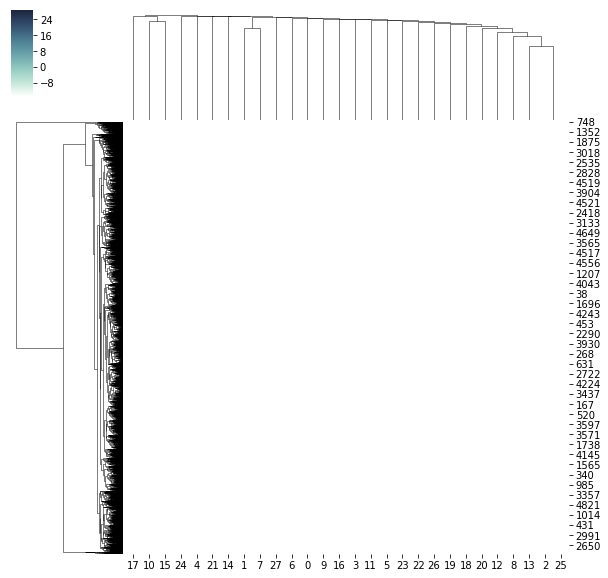

In [444]:
# Dendogram

cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(telco_scaled, cmap=cmap, linewidths=.5)

# Elbow Ananlysis

In [445]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( telco_scaled2 )
    cluster_errors.append( clusters.inertia_ )

In [446]:
telco_scaled2.shape

(4887, 14)

In [447]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,cluster_errors,num_clusters
0,68418.000000,1
1,58730.555142,2
2,50206.243811,3
3,44962.849115,4
4,39576.014268,5
5,34731.321263,6
6,30028.372614,7
7,26740.613006,8
8,23892.310245,9
9,22910.770181,10


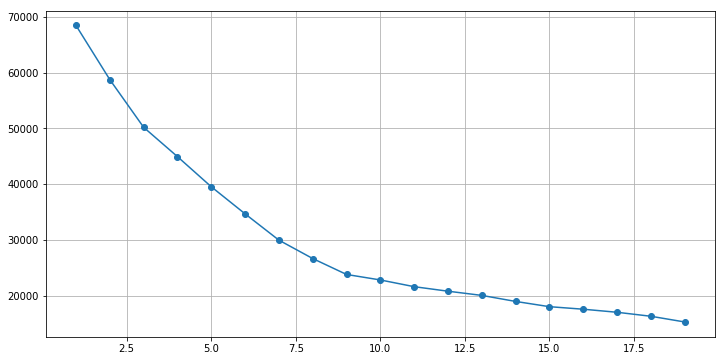

In [448]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Silhouette Coefficient

In [449]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(telco_scaled2, km_3.labels_)

0.29897611113733075

In [450]:
# calculate SC for K=3 through K=12
k_range = range(3, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(telco_scaled2)
    scores.append(metrics.silhouette_score(telco_scaled2, km.labels_))

In [451]:
scores

[0.17072797618811977,
 0.2180421208507792,
 0.2176523445971412,
 0.28577181135935115,
 0.29904660958657187,
 0.3106509408293836,
 0.31198040864641352,
 0.33085826663278756,
 0.32311262830855725]

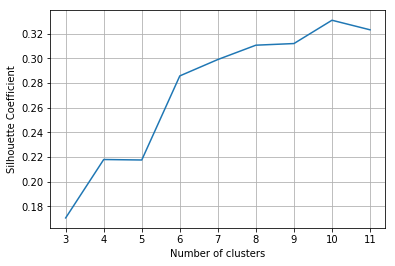

In [452]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

The number of clusters can be 6, 7 or 8

In [453]:
telco_num.head(5)

,Unnamed: 0,AGE,CHURNED,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,channel_low_churn,...,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0,69.0,0,2.046575,0,1,0,0,1,1,...,0,0,1,0,1,2,4,3,1,2
1,1,43.0,0,3.271233,0,0,0,0,1,1,...,0,0,1,0,1,0,1,1,2,0
2,2,58.0,0,3.134247,0,0,1,0,1,1,...,0,0,1,0,1,0,1,1,2,1
3,3,36.0,0,2.295890,0,1,0,0,1,1,...,0,0,0,0,1,2,0,1,1,2
4,4,56.0,0,1.536986,0,0,1,0,1,1,...,0,0,0,0,1,0,4,3,2,1


In [455]:
telco_num.drop(['Unnamed: 0'], inplace=True, axis=1)
telco_num.head(5)

,AGE,CHURNED,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,channel_low_churn,source_low_churn,...,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,69.0,0,2.046575,0,1,0,0,1,1,0,...,0,0,1,0,1,2,4,3,1,2
1,43.0,0,3.271233,0,0,0,0,1,1,0,...,0,0,1,0,1,0,1,1,2,0
2,58.0,0,3.134247,0,0,1,0,1,1,0,...,0,0,1,0,1,0,1,1,2,1
3,36.0,0,2.295890,0,1,0,0,1,1,1,...,0,0,0,0,1,2,0,1,1,2
4,56.0,0,1.536986,0,0,1,0,1,1,1,...,0,0,0,0,1,0,4,3,2,1


In [459]:
col_list= list(telco_num.columns.difference(['cluster_3',
 'cluster_4',
 'cluster_5',
 'cluster_6',
 'cluster_7',
 'cluster_8']))
col_list

['AGE',
 'CHURNED',
 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE',
 'channel_low_churn',
 'comp_owner_N',
 'comp_owner_Y',
 'feedback_GOOD',
 'feedback_Missing',
 'model_low',
 'model_medium',
 'plan_low',
 'plan_medium',
 'plan_zero',
 'recent_channel_low_churn_channel',
 'recent_channel_medium_churn_channel',
 'satellite_low_churn_satellite',
 'satellite_medium_churn_satellite',
 'site_Missing',
 'site_Spaceway',
 'source_low_churn',
 'source_medium_churn',
 'source_zero_churn',
 'status_Unknown',
 'warranty_low_churn_warranty',
 'warranty_medium_churn_warranty',
 'zip_low_churn_zip',
 'zip_medium_churn_zip']

In [ ]:
#Insights for 6 clusters

In [460]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_6=telco_num.groupby('cluster_6')\
.apply(lambda x: x[col_list].mean()).T
cluster_6

cluster_6,0,1,2,3,4,5
AGE,46.375566,43.956364,43.877704,43.214184,45.142857,44.222539
CHURNED,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,2.851152,2.712256,2.737950,2.729472,2.660687,2.738270
channel_low_churn,0.995475,0.995325,0.997504,0.994326,0.992481,0.994294
comp_owner_N,0.642534,0.585974,0.555740,0.592908,0.691729,0.573466
comp_owner_Y,0.081448,0.109091,0.112313,0.114894,0.052632,0.111270
feedback_GOOD,0.009050,0.642078,0.640599,0.000000,0.518797,0.540656
feedback_Missing,0.226244,0.000000,0.000000,1.000000,0.203008,0.189729
model_low,0.199095,0.164675,0.159734,0.163121,0.157895,0.155492
model_medium,0.656109,0.709610,0.706323,0.675177,0.744361,0.694722


In [478]:
var_list = ['feedback_GOOD', 'feedback_Missing', 'plan_low', 'plan_medium', 'plan_zero','recent_channel_medium_churn_channel']

[0 1 2 3 4 5]
<class 'numpy.ndarray'>


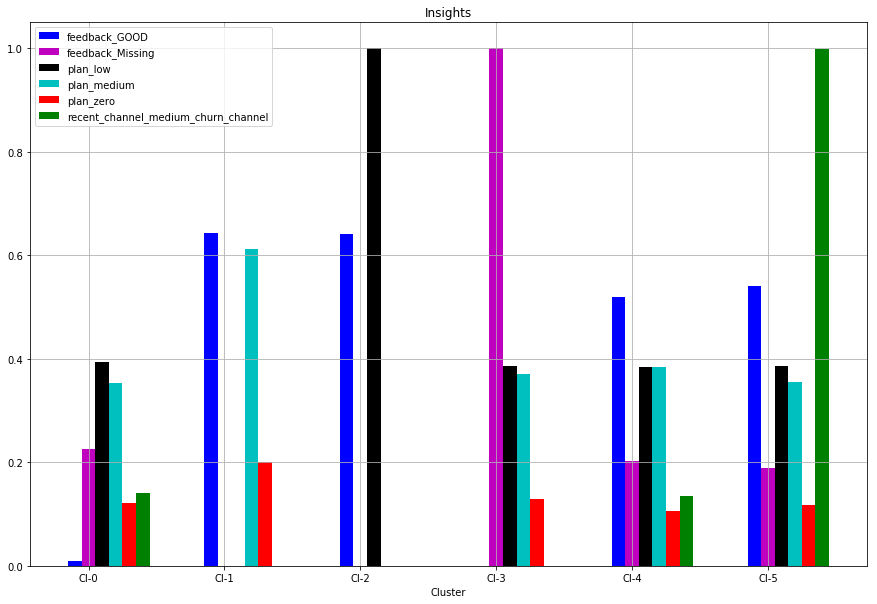

In [490]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(var_list))
print(index)
print(type(index))

feedback_good=(cluster_6.loc['feedback_GOOD',:].values)
feedback_Missing=(cluster_6.loc['feedback_Missing',:].values)
plan_low= (cluster_6.loc['plan_low',:].values)
plan_medium=cluster_6.loc['plan_medium',:].values
plan_zero=cluster_6.loc['plan_zero',:].values
recent_channel_medium_churn_channel=cluster_6.loc['recent_channel_medium_churn_channel',:].values

bar_width=.10
b1=plt.bar(index,feedback_good,color='b',label='feedback_GOOD',width=bar_width)
b2=plt.bar(index+bar_width,feedback_Missing,color='m',label='feedback_Missing',width=bar_width)
b3=plt.bar(index+2*bar_width,plan_low,color='k',label='plan_low',width=bar_width)
b4=plt.bar(index+3*bar_width,plan_medium,color='c',label='plan_medium',width=bar_width)
b5=plt.bar(index+4*bar_width,plan_zero,color='r',label='plan_zero',width=bar_width)
b6=plt.bar(index+5*bar_width,recent_channel_medium_churn_channel,color='g',label='recent_channel_medium_churn_channel',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [501]:
#Cl-5 has majority of users with recent_channel in medium category
#feedback_GOOD has high count for clusters 1,2,4,5 and almost zero in 0 and 3
#feedback_Missing has highest count in cluster 3

In [480]:
#Insights for 7 clusters

In [484]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_7=telco_num.groupby('cluster_7')\
.apply(lambda x: x[col_list].mean()).T
cluster_7

cluster_7,0,1,2,3,4,5,6
AGE,44.367059,43.829154,43.627071,44.293276,46.286364,45.219697,45.318182
CHURNED,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,2.736182,2.697250,2.735823,2.741037,2.854922,2.658344,2.707098
channel_low_churn,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
comp_owner_N,0.000000,0.652038,0.650260,0.575107,0.645455,0.689394,0.409091
comp_owner_Y,1.000000,0.000000,0.000000,0.110157,0.081818,0.053030,0.090909
feedback_GOOD,0.508235,0.518025,0.530052,0.539342,0.009091,0.522727,0.500000
feedback_Missing,0.188235,0.181818,0.183152,0.191702,0.227273,0.196970,0.272727
model_low,0.155294,0.159875,0.167061,0.157368,0.200000,0.159091,0.000000
model_medium,0.717647,0.712382,0.690961,0.692418,0.654545,0.742424,1.000000


[0 1 2 3 4 5 6]


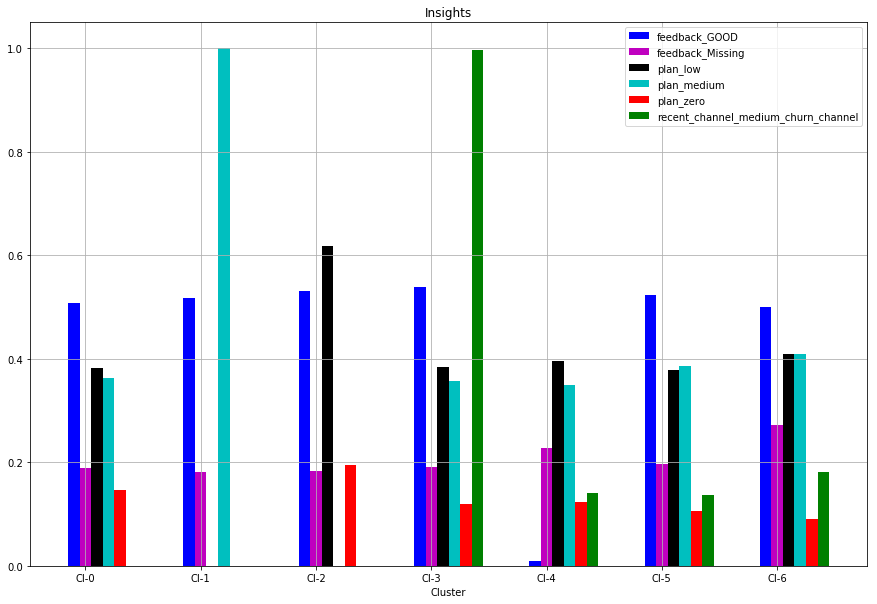

In [492]:
fig,ax=plt.subplots(figsize=(15,10))
#index=np.arange(len(var_list))
index = np.arange(7)
print(index)

feedback_good=(cluster_7.loc['feedback_GOOD',:].values)
feedback_Missing=(cluster_7.loc['feedback_Missing',:].values)
plan_low= (cluster_7.loc['plan_low',:].values)
plan_medium=cluster_7.loc['plan_medium',:].values
plan_zero=cluster_7.loc['plan_zero',:].values
recent_channel_medium_churn_channel=cluster_7.loc['recent_channel_medium_churn_channel',:].values

bar_width=.10
b1=plt.bar(index,feedback_good,color='b',label='feedback_GOOD',width=bar_width)
b2=plt.bar(index+bar_width,feedback_Missing,color='m',label='feedback_Missing',width=bar_width)
b3=plt.bar(index+2*bar_width,plan_low,color='k',label='plan_low',width=bar_width)
b4=plt.bar(index+3*bar_width,plan_medium,color='c',label='plan_medium',width=bar_width)
b5=plt.bar(index+4*bar_width,plan_zero,color='r',label='plan_zero',width=bar_width)
b6=plt.bar(index+5*bar_width,recent_channel_medium_churn_channel,color='g',label='recent_channel_medium_churn_channel',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5', 'Cl-6'))

plt.legend()

In [502]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_8=telco_num.groupby('cluster_8')\
.apply(lambda x: x[col_list].mean()).T
cluster_8

cluster_8,0,1,2,3,4,5,6,7
AGE,43.765594,43.294737,43.999301,45.219697,44.250000,45.318182,46.286364,43.727669
CHURNED,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,2.771640,2.681310,2.692891,2.658344,2.740897,2.707098,2.854922,2.738800
channel_low_churn,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
comp_owner_N,0.579477,0.600000,0.581818,0.689394,0.576149,0.409091,0.645455,0.559913
comp_owner_Y,0.102616,0.130526,0.107692,0.053030,0.110632,0.090909,0.081818,0.116558
feedback_GOOD,1.000000,0.549474,0.519580,0.522727,0.540230,0.500000,0.009091,0.000000
feedback_Missing,0.000000,0.191579,0.181818,0.196970,0.189655,0.272727,0.227273,0.381264
model_low,0.149899,0.160000,0.168531,0.159091,0.156609,0.000000,0.200000,0.172113
model_medium,0.706237,0.694737,0.709091,0.742424,0.693966,1.000000,0.654545,0.685185


[0 1 2 3 4 5 6 7]


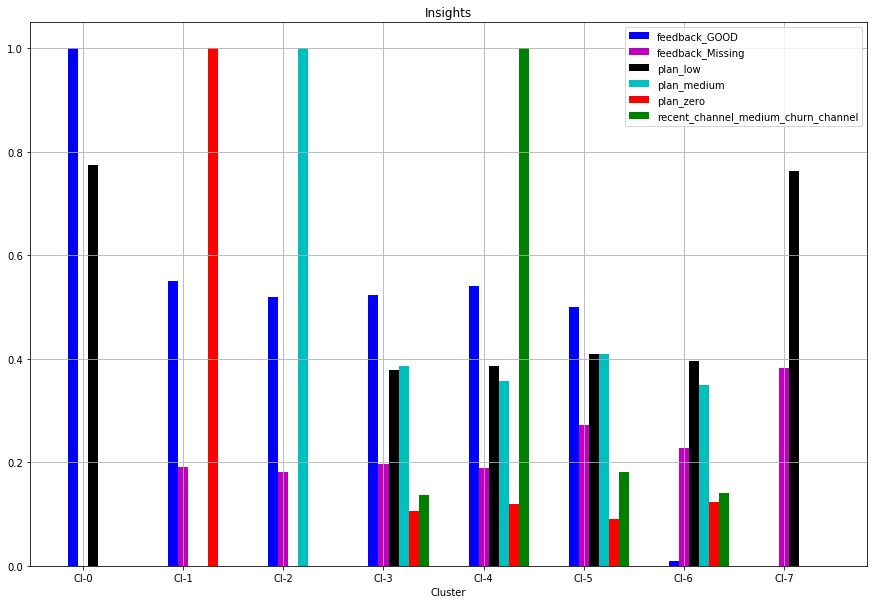

In [503]:
fig,ax=plt.subplots(figsize=(15,10))
#index=np.arange(len(var_list))
index = np.arange(8)
print(index)

feedback_good=(cluster_8.loc['feedback_GOOD',:].values)
feedback_Missing=(cluster_8.loc['feedback_Missing',:].values)
plan_low= (cluster_8.loc['plan_low',:].values)
plan_medium=cluster_8.loc['plan_medium',:].values
plan_zero=cluster_8.loc['plan_zero',:].values
recent_channel_medium_churn_channel=cluster_8.loc['recent_channel_medium_churn_channel',:].values

bar_width=.10
b1=plt.bar(index,feedback_good,color='b',label='feedback_GOOD',width=bar_width)
b2=plt.bar(index+bar_width,feedback_Missing,color='m',label='feedback_Missing',width=bar_width)
b3=plt.bar(index+2*bar_width,plan_low,color='k',label='plan_low',width=bar_width)
b4=plt.bar(index+3*bar_width,plan_medium,color='c',label='plan_medium',width=bar_width)
b5=plt.bar(index+4*bar_width,plan_zero,color='r',label='plan_zero',width=bar_width)
b6=plt.bar(index+5*bar_width,recent_channel_medium_churn_channel,color='g',label='recent_channel_medium_churn_channel',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5', 'Cl-6', 'Cl-7'))

plt.legend()

# Checking performance metrics

In [496]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score

In [497]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(telco_scaled2)
    score_c[n]=calinski_harabaz_score(telco_scaled2,km_score.labels_)
    score[n]=silhouette_score(telco_scaled2,km_score.labels_)

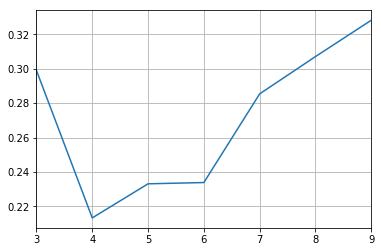

In [498]:
pd.Series(score).plot()

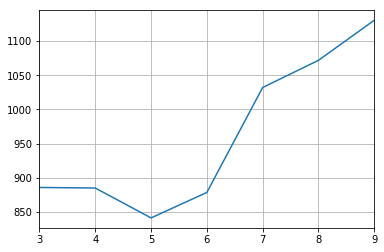

In [499]:
pd.Series(score_c).plot()

In [500]:
# calculate SC for K=3 through K=12
k_range = range(3, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(telco_scaled2)
    scores.append(metrics.silhouette_score(telco_scaled2, km.labels_))